# How well do jobs and skills pay for Data Analysts?

## Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualise for highest paying skills and most demanded skills

In [8]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
# Filter for the job titles and country

df_PT = df[(df['job_country'] == 'Portugal')].dropna(subset=['salary_year_avg'])

In [10]:
job_titles = df_PT['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Scientist',
 'Software Engineer']

In [11]:
df_PT_top6 = df_PT[df_PT['job_title_short'].isin(job_titles)]

In [12]:
job_order = df_PT_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

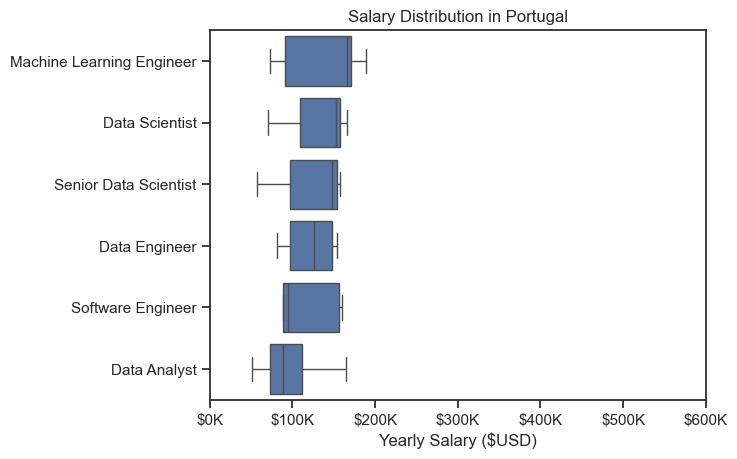

In [13]:
sns.boxplot(data=df_PT_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

#this is all the same
plt.title('Salary Distribution in Portugal')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K')
ax = plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary vs Skill for Data Analysts

In [14]:
df_DA_PT = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Portugal')].copy()

df_DA_PT = df_DA_PT.dropna(subset=['salary_year_avg'])

In [15]:
df_DA_PT = df_DA_PT.explode('job_skills')

df_DA_PT[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1555,111175.0,databricks
1555,111175.0,spark
67571,111175.0,sql
67571,111175.0,bigquery
67571,111175.0,looker


In [19]:
df_DA_top_pay = df_DA_PT.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [22]:
df_DA_skills = df_DA_PT.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
bigquery,3,118190.0
sql,15,111175.0
r,5,111175.0
tableau,8,111175.0
looker,7,111175.0
spark,4,100137.5
python,13,89204.0
power bi,5,89100.0
excel,8,76875.0


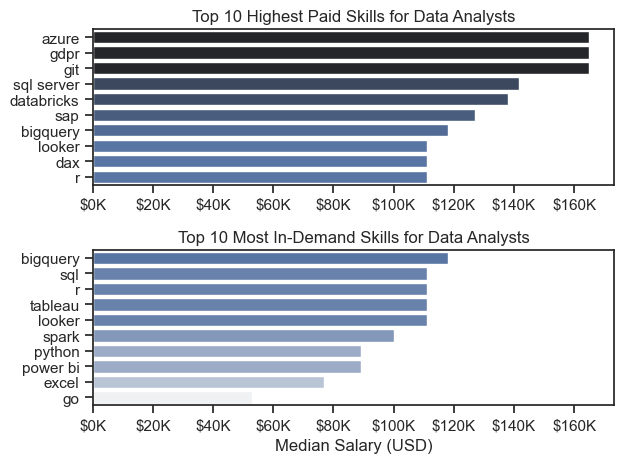

In [23]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()